In [1]:

import os
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn_utils import classify_data, sample_size_impact, search_params

FILENAME = "detect.csv"
model_type = "nb"

In [2]:

# load sample data
data = pd.read_csv(os.path.join(os.curdir, "data", FILENAME))

# separate into train and test
x_train, x_test, y_train, y_test = train_test_split(
                                                    data["text"], data["label"], 
                                                    test_size=0.3, 
                                                    random_state=0
                                                    )


# Impact of Tokenizer

Default Tokenizer

              precision    recall  f1-score   support

           0       0.72      0.91      0.80      2968
           1       0.88      0.65      0.75      3032

    accuracy                           0.78      6000
   macro avg       0.80      0.78      0.77      6000
weighted avg       0.80      0.78      0.77      6000



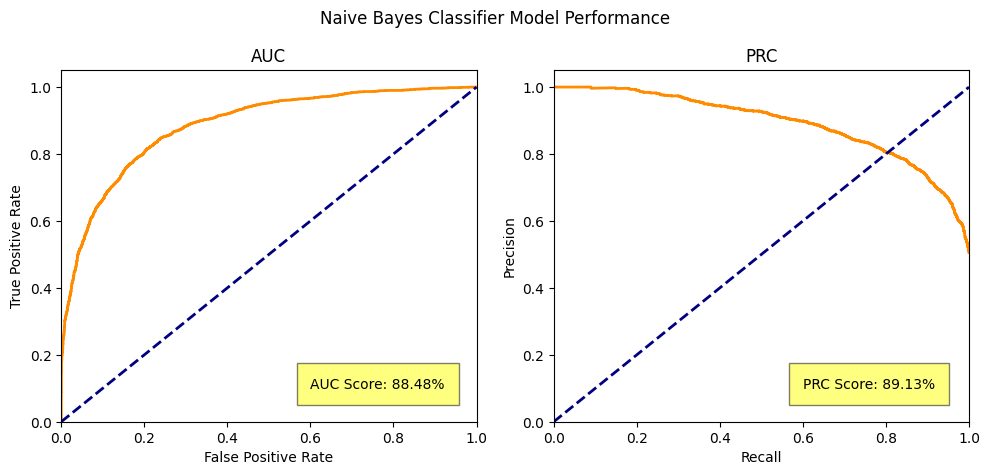

Custom Tokenizer; stopwords = 'english'

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      2968
           1       0.86      0.65      0.74      3032

    accuracy                           0.77      6000
   macro avg       0.79      0.77      0.77      6000
weighted avg       0.79      0.77      0.77      6000



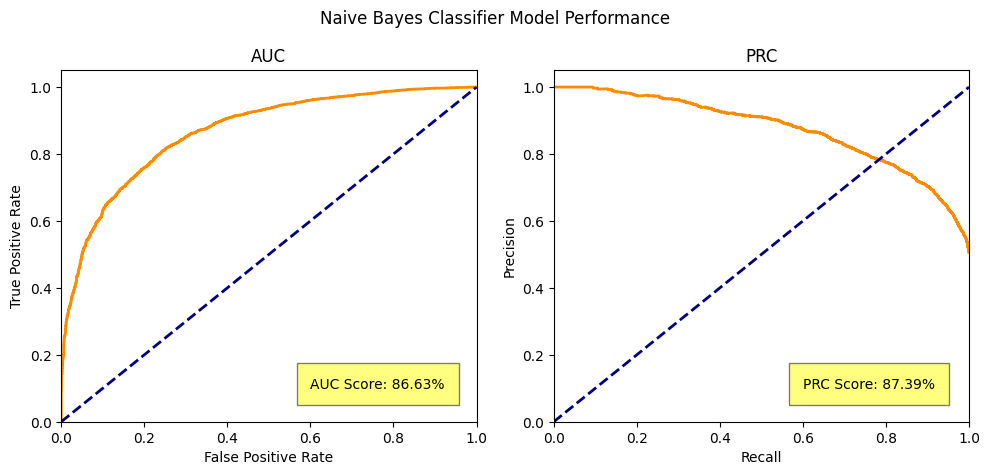

In [3]:

# default tokenizer
print("Default Tokenizer\n")
_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=1, 
            stop_words=None,
            algorithm_para=1.0
            )

# custom tokenizer
print("Custom Tokenizer; stopwords = 'english'\n")
_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=1, 
            stop_words="english",
            algorithm_para=1.0
            )

# Optimize with Grid Search

In [4]:

min_df, stop_words, C = search_params(x_train, y_train, clf=model_type)

_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=min_df, 
            stop_words=stop_words,
            algorithm_para=C
            )


Optimal Grid Search Parameters:
Best f1 score = 0.795
Min. DF = 5
Stopwords = None
Classifier Hyper-parameter: 1



# Impact of Sample Size

In [ ]:

sample_size_impact(data["text"], data["label"], model_type)
